In [1]:
import pandas 
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
data = pandas.read_csv("household_power_consumption.txt", sep = ";")
data.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Transform object into more suitable features

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
tmp_df = pandas.DataFrame.copy(data)
tmp_df = tmp_df.convert_objects(convert_numeric=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [5]:
tmp_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
tmp_df.dtypes # Looks good 

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [7]:
# Sanity check, nothing must change on sub_metering
tmp_df.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
data.isna().any() # Doesn't detect Nan on april 

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [9]:
# pandas.to_datetime(tmp_df["Date"]).head()
pandas.to_datetime(tmp_df["Date"], infer_datetime_format=True).head()
pandas.to_datetime(tmp_df["Time"], format="%H:%M:%S").head()

0   1900-01-01 17:24:00
1   1900-01-01 17:25:00
2   1900-01-01 17:26:00
3   1900-01-01 17:27:00
4   1900-01-01 17:28:00
Name: Time, dtype: datetime64[ns]

# Modify dtypes on data

In [10]:
data = data.convert_objects(convert_numeric=True)
data["Date"] = pandas.to_datetime(data["Date"], infer_datetime_format=True)
data["Time"] = pandas.to_datetime(data["Time"], format="%H:%M:%S") # bad year - TODO : Mix both column into one

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
data.isna().any() # detects Nan on april 

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

In [13]:
data.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

# Data Set Information:

Abstract: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.





This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). 

Notes: 

* 1.$(global\_active\_power*1000/60 - sub\_metering_1 - sub\_metering_2 - sub\_metering_3)$ represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 
* 2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


# Attribute Information:

* 1.date: Date in format dd/mm/yyyy 
* 2.time: time in format hh:mm:ss 
* 3.global_active_power: household global minute-averaged active power (in kilowatt) 
* 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
* 5.voltage: minute-averaged voltage (in volt) 
* 6.global_intensity: household global minute-averaged current intensity (in ampere) 
* 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
* 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
* 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



# Analyze and experiment on data

In [14]:
 # Do we have all informations
print(data.shape)
print(data[:1]["Date"])
print(data[-1:]["Date"])

(2075259, 9)
0   2006-12-16
Name: Date, dtype: datetime64[ns]
2075258   2010-11-26
Name: Date, dtype: datetime64[ns]


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: datetime64[ns](2), float64(7)
memory usage: 142.5 MB


In [16]:
data[191000:].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
191000,2007-04-28,1900-01-01 08:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191001,2007-04-28,1900-01-01 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191002,2007-04-28,1900-01-01 08:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191003,2007-04-28,1900-01-01 08:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191004,2007-04-28,1900-01-01 08:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Retrieve NA -> Requires modification
indices_na = np.where(data['Sub_metering_3'].isna())[0]
len(indices_na), indices_na

(25979, array([   6839,    6840,   19724, ..., 1990187, 1990188, 2027411]))

In [18]:
# Retrieve NA on Voltage -> Requires deletion
indices_drop = np.where(data['Voltage'].isna())[0]
len(indices_drop), indices_drop

(25979, array([   6839,    6840,   19724, ..., 1990187, 1990188, 2027411]))

In [19]:
np.sum((indices_na == indices_drop)) # Same array -> Drop

25979

In [20]:
data.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [21]:
data.drop(indices_na).shape[0] / tmp_df.shape[0] * 100 # drop 1.25% as expected

98.7481562542314

In [22]:
data.drop(indices_na, inplace = True)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [27]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [29]:
data.isna().any()  # Looks good

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool


# Vizualisation

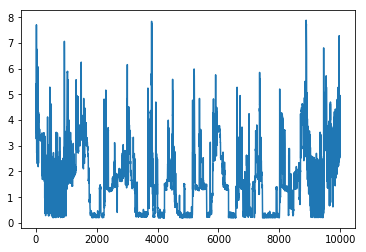

In [23]:
rang = 10000
plt.plot(range(rang), data["Global_active_power"][:rang])
plt.show()

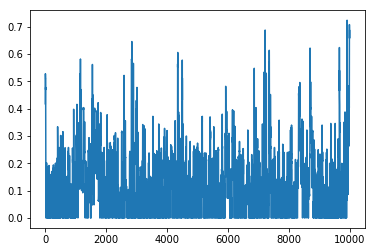

In [24]:
rang = 10000
plt.plot(range(rang), data["Global_reactive_power"][:rang])
plt.show()

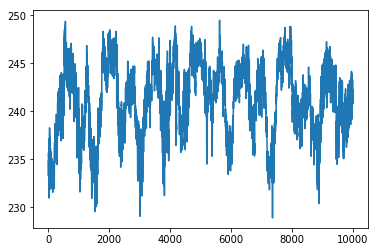

In [25]:
rang = 10000
plt.plot(range(rang), data["Voltage"][:rang])
plt.show()

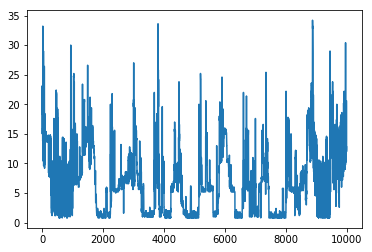

In [26]:
rang = 10000
plt.plot(range(rang), data["Global_intensity"][:rang])
plt.show()

# Problematic :  comparer les valeurs en /h ? /jours / Mois / an